In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [41]:
df=pd.read_csv('simple.csv')

In [42]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [15]:
df.isna().sum().any()

False

DataFrame columns: Index(['SAT', 'GPA'], dtype='object')


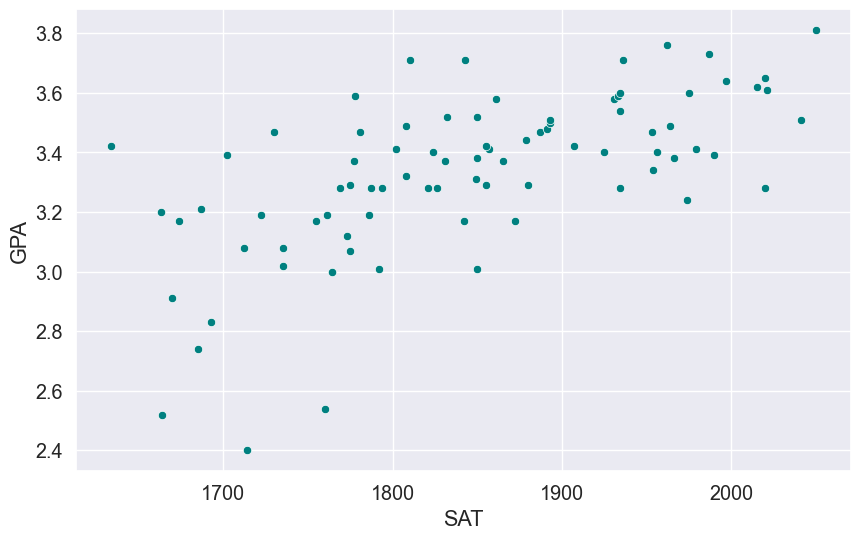

In [20]:

# Ensure the DataFrame has been loaded correctly
print("DataFrame columns:", df.columns)

# Check if 'SAT' and 'GPA' columns exist in the DataFrame
if 'SAT' in df.columns and 'GPA' in df.columns:
    sns.set_context('notebook', font_scale=1.3)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='SAT', y='GPA', color='teal')
    plt.xlabel('SAT')
    plt.ylabel('GPA')
    plt.show()
else:
    print("Columns 'SAT' and 'GPA' not found in the DataFrame.")


DataFrame columns: Index(['SAT', 'GPA'], dtype='object')


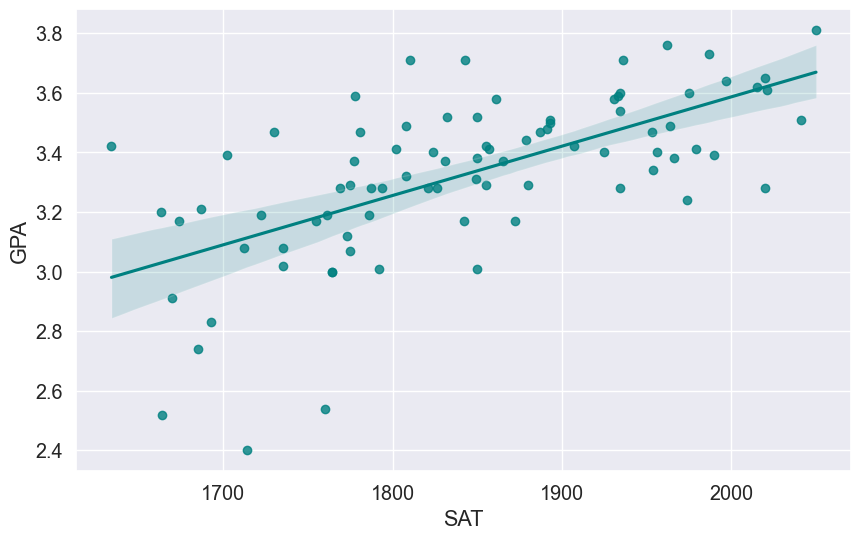

In [21]:
# Ensure the DataFrame has been loaded correctly
print("DataFrame columns:", df.columns)

# Check if 'SAT' and 'GPA' columns exist in the DataFrame
if 'SAT' in df.columns and 'GPA' in df.columns:
    sns.set_context('notebook', font_scale=1.3)
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='SAT', y='GPA', color='teal')
    plt.xlabel('SAT')
    plt.ylabel('GPA')
    plt.show()
else:
    print("Columns 'SAT' and 'GPA' not found in the DataFrame.")

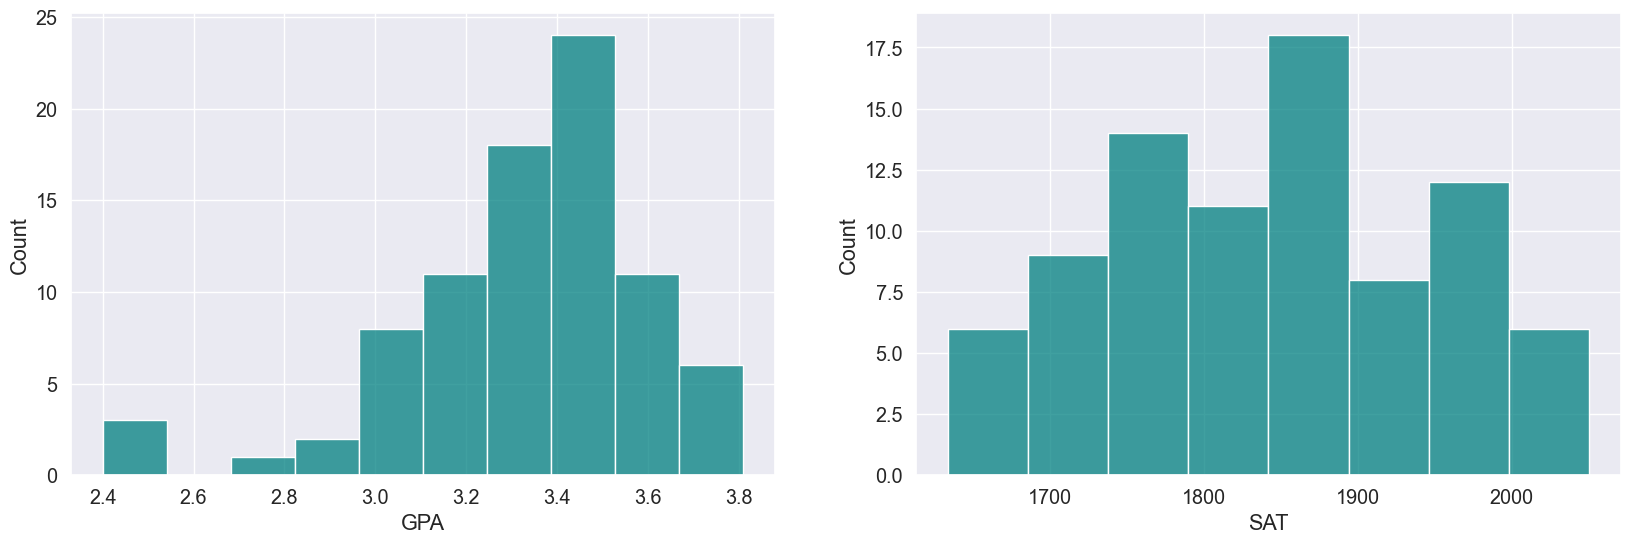

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ax1 = sns.histplot(df['GPA'], color = 'teal', ax = ax[0])
ax1 = sns.histplot(df['SAT'], color = 'teal', ax = ax[1])

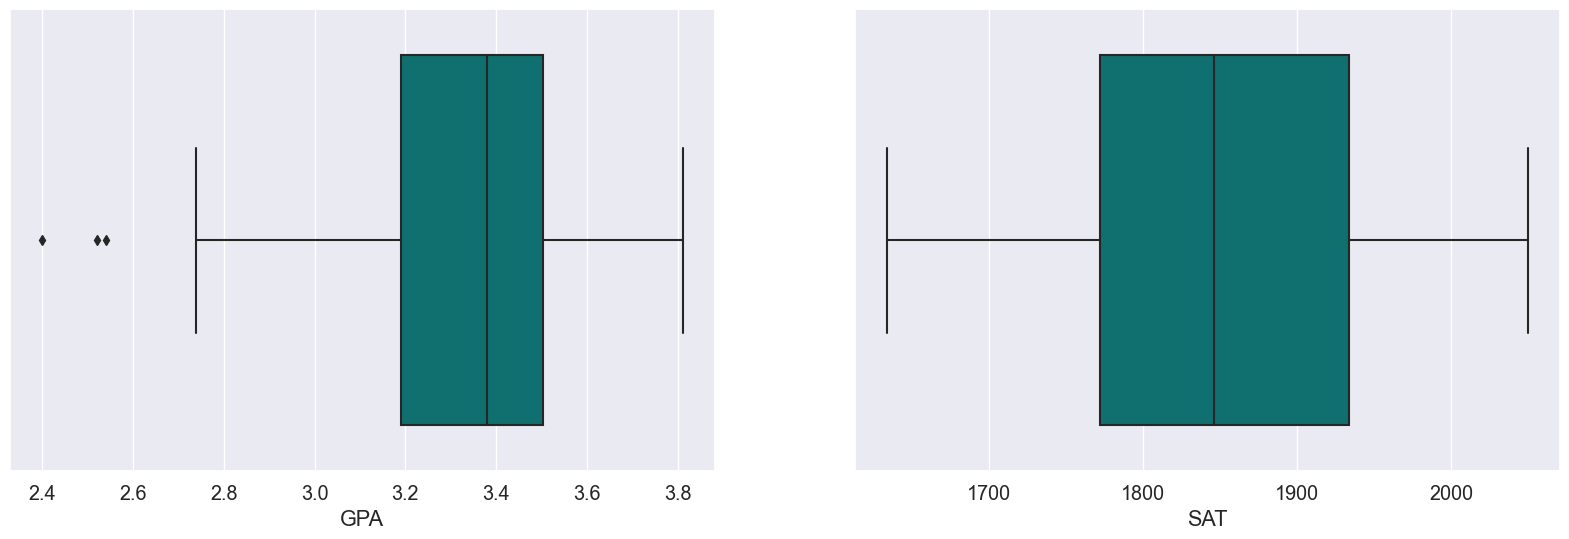

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ax1 = sns.boxplot(x = df['GPA'], color = 'teal', ax = ax[0])
ax1 = sns.boxplot(x = df['SAT'], color = 'teal', ax = ax[1])

In [24]:
outliers_indices = [df[df['GPA'] == i].index[0] for i in df['GPA'] if i < 2.8]
df = df.drop(index = outliers_indices, axis = 0).reset_index(drop= True)

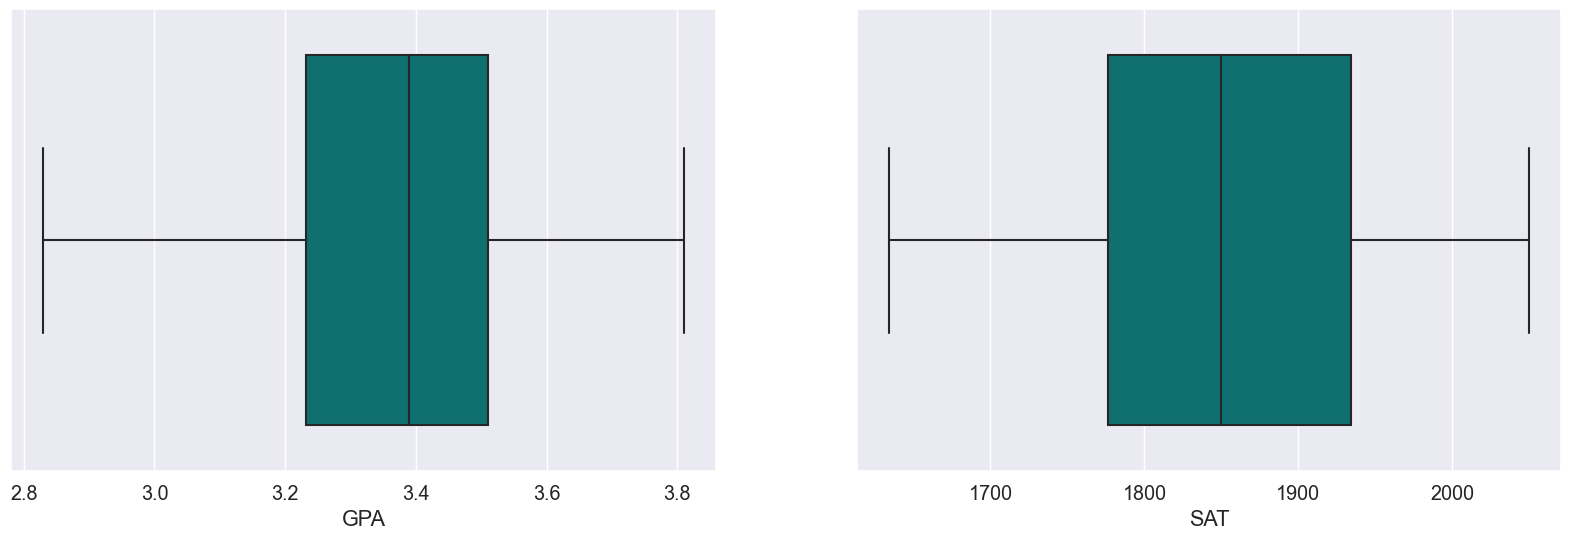

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ax1 = sns.boxplot(x = df['GPA'], color = 'teal', ax = ax[0])
ax1 = sns.boxplot(x = df['SAT'], color = 'teal', ax = ax[1])

In [29]:
def split_data(df, test_ratio = 0.2):
    shuffled_indices = np.random.RandomState(seed=42).permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    train_set = df.iloc[shuffled_indices[test_set_size:]]
    test_set = df.iloc[shuffled_indices[:test_set_size]]
    return train_set, test_set

train_data, test_data = split_data(df)

In [30]:
X_train = train_data['SAT']
y_train = train_data['GPA']
X_test = test_data['SAT']
y_test = test_data['GPA']

In [31]:
# Scaling
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = (X_test - mean) / std
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [33]:
class LinearRegression():

    def __init__(self, learning_rate = 0.01, no_of_iterations = 1000, costs = [], thetas = []):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.costs = []
        self.thetas = []

    def fit(self, X, Y):
        self.m, self.n = X.shape # Number of rows and columns
        self.X = X
        self.Y = Y.values.reshape(-1, 1)
        self.theta = np.random.randn(2, 1)
        
        for i in range(self.no_of_iterations):
            y_pred = self.predict(self.X)
            error = y_pred.reshape(len(y_pred)) - self.Y.reshape(len(Y))
            cost = 1 / ( 2 * self.m) * np.dot(error.T, error)
            self.costs.append(cost)
            gradients = (2 / self.m) * (self.X.T).dot(y_pred - self.Y)
            self.theta = self.theta - self.learning_rate * gradients
            if i in [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]:
                self.thetas.append(self.theta)
      
    def predict(self, X):
        pred = X.dot(self.theta)
        return pred

In [34]:
model = LinearRegression(no_of_iterations= 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(len(y_pred))

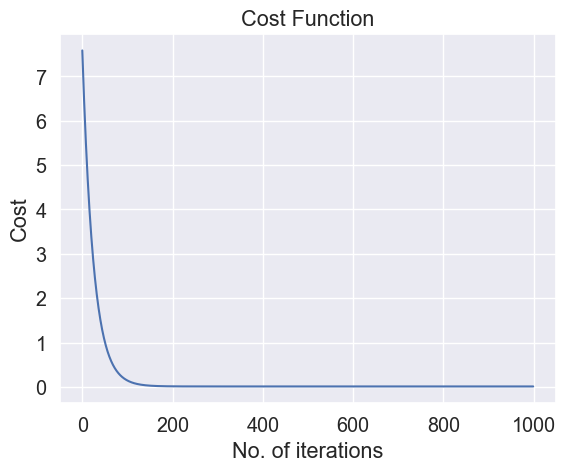

In [35]:
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(model.costs)
plt.show()

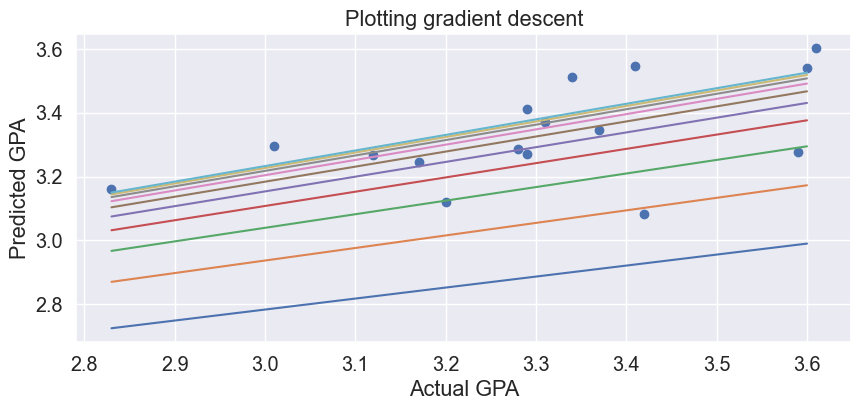

In [36]:
plt.figure(figsize=(10,4))
plt.scatter(y_test, y_pred)
for i in range(0, 10):
    pred = X_test.dot(model.thetas[i])
    pred_temp = [pred[1], pred[14]]
    y_temp = [y_test[0], y_test[68]]
    plt.plot(y_temp, pred_temp)
    
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Plotting gradient descent')
plt.show()

In [37]:
def r_squared(y, y_pred):
    sst, ssr, r_square = 0, 0, 0
    y_mean = np.mean(y)
    ssr = np.sum([(y - y_pred)**2 for y, y_pred in zip(y, y_pred)])
    sst = np.sum([(y - y_mean)**2 for y in y])    
    r_sqr = 1 - (ssr / sst)  
    return round(r_sqr, 3)
    

In [38]:
r_sq = r_squared(y_test, y_pred)
print(f'R-square: {r_sq}')

R-square: 0.238


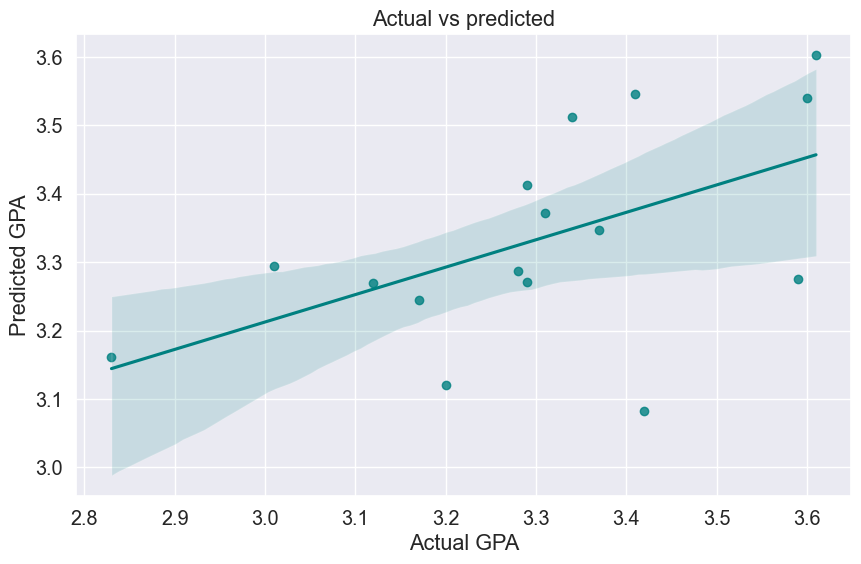

In [39]:
plt.figure(figsize = (10, 6))
sns.regplot(x = y_test, y = y_pred, color = 'teal')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs predicted')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features (X) and target variable (y)
X = df[['SAT']]
y = df['GPA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 0.05248610269753723
Mean Absolute Error (MAE): 0.16268831265429598
